# India's GDP Estimation
# Using Scikit-Learn for Non Linear Regression

## 1. Bringing in the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Let us examine a few graphs now to better understand their shapes:
 - a. Linear
 - b. Cubic
 - c. Quadratic
 - d. Exponential
 - e. Logarithmic
 - f. Sigmoidal/Logistic

## a. Linear:

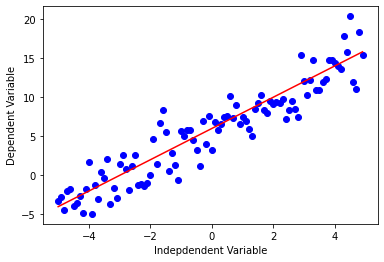

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 6
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## b. Cubic

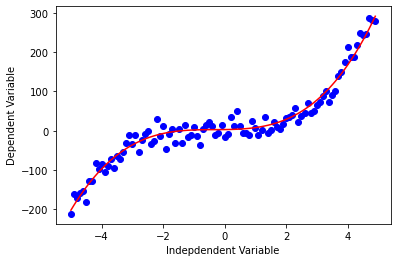

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x**3) + 2*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## c. Qadratic:

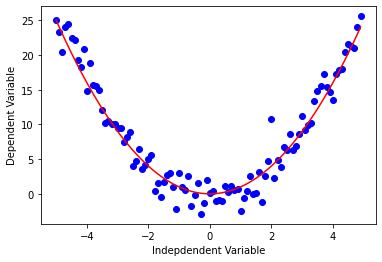

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## 4. Exponential

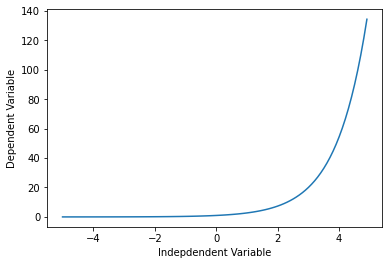

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## e. Logarithmic:

<ipython-input-8-10bce0219f26>:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


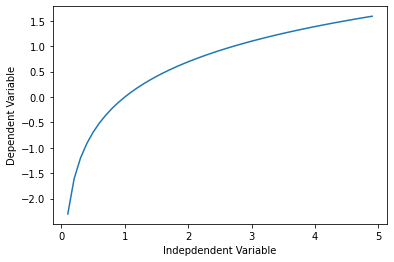

In [8]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## f. Sigmoidal:

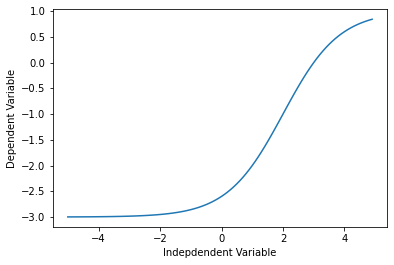

In [9]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## 2. Non-Linear Regression example
 - We will attempt to apply a non-linear model to the datapoints corresponding to India's GDP from 1961 to 2021 as an illustration. We obtain a dataset with two columns: a year between 1961 and 2021, and the corresponding annual gross domestic product in US dollars for India for that year.

In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv("India_GDP_Data.csv")
df.head()

,Year,GDP_In_Billion_USD
0,2021,3173.40
1,2020,2667.69
2,2019,2831.55
3,2018,2702.93
4,2017,2651.47


## Plotting the dataset

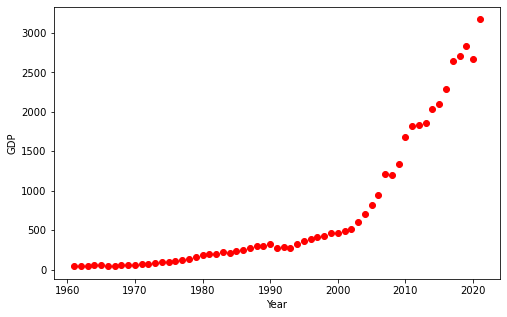

In [13]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["GDP_In_Billion_USD"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Deciding which model to use to match this data: Sigmoidal

In [14]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

 - Let's try and fit the data with a random sigmoidal function.

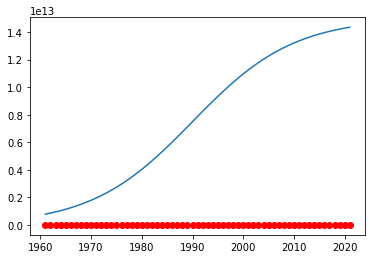

In [15]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

 - After examining the graph, we discover that in order to improve the data's fit, we must normalize the data and optimize the parameters.

In [16]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [17]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 346.186300, beta_2 = 0.994538


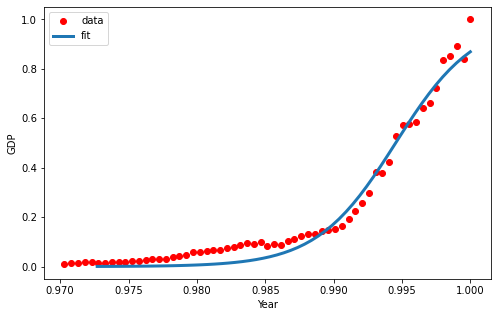

In [18]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Evaluating the Machine Learning Model

In [19]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


## Conclusion:

### Regression model effectiveness is typically assessed using the three provided metrics.
 - The average absolute difference between the predicted and real values is measured by mean absolute error (MAE). The MAE in this instance is 0.03; consequently, the model's predictions are, on average, 0.03 units off from the actual numbers.
 - The average squared difference between the predicted and real values is measured by residual sum of squares (MSE). As the squared difference is almost zero in this instance, the MSE is 0.00, indicating that the model's predictions and real values are very closely matched.
 - The R2-score is a metric for how much of the variance in the dependent variable is accounted for by the model's independent variables. The dependent variable's variation is explained by the model in this instance by 97%, as indicated by the R2-score of 0.97, which shows that the model fits the data well.
 - Overall, based on these measures, the model appears to perform well in terms of accurately predicting the dependent variable, as shown by the low MAE and MSE and the high R2-score.